In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

%matplotlib inline

In [2]:
def GC_test(sol):
    XY=[] # Full model prediction variables (X_{t-1}, X_{t-2}, ..., X_{t-p}, Y_{t-1}, Y_{t-2}, ..., Y_{t-p}))
    X=[] # Reduced model prediction variables (X_{t-1}, X_{t-2}, ..., X_{t-p})
    Xcur=[] # Response Variable (X_t)

    for i in range(T-p):
        XY.append([sol[0][i], sol[0][i+1], sol[1][i], sol[1][i+1]])
        X.append([sol[0][i], sol[0][i+1]])
        Xcur.append(sol[0][i+2])

    XY=np.array(XY)
    X=np.array(X)
    Xcur=np.array(Xcur)

    # Model Fitting
    reg = LinearRegression().fit(XY, Xcur)
    regr = LinearRegression().fit(X, Xcur)
    print('The standard deviation of the full model is ', np.std(reg.predict(XY)-Xcur))
    print('The standard deviation of the reduced model is ', np.std(regr.predict(X)-Xcur))

Expected mean is:  0.0
Mean is:  -0.014967636396975651
Expected standard deviation is:  1.973855084879307
Actual standard deviation is:  1.9794973116426804


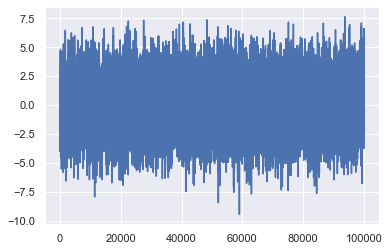

In [3]:
# Initialization
b0=0
b1=0.5
b2=0.4
b=[b0,b1,b2]
sig=1
p=2
T=100000
eps = sig*np.random.randn(1, T)

# Create 1D 
X=[]
for i in range(T):
    sum=b[0]+eps[0,i]
    if i<p:
        for j in range(1,i+1):
            sum+=b[j]*X[i-j]
    else:
        for j in range(1,p+1):
            sum+=b[j]*X[i-j]
    X.append(sum)

t=list(range(T))
plt.plot(t,X)

if p == 2:
    mean_exp_1D = mean_exp_1D = b0/(1-b1-b2)
    print("Expected mean is: ", mean_exp_1D)
    mean_1D = np.mean(X)
    print("Mean is: ", mean_1D)
    var_exp_1D = (1-b2)*sig**2/(1-b1-b2)/(1+b2)/(1+b1-b2)
    std_exp_1D = var_exp_1D**(1/2)
    print("Expected standard deviation is: ", std_exp_1D)
    std_1D = np.std(X)
    print("Actual standard deviation is: ", std_1D)
elif p == 1:
    mean_exp_1D = b0/(1-b1)
    print("Expected mean is: ", mean_exp_1D)
    mean_1D = np.mean(X)
    print("Actual mean is: ", mean_1D)
    std_exp_1D = (sig**2/(1-b1**2))**(1/2)
    print("Expected standard deviation is: ", std_exp_1D)
    std_1D = np.std(X)
    print("Actual standard deviation is: ", std_1D)

The standard deviation of the full model is  0.8470834834266564
The standard deviation of the reduced model is  0.8508630920985947


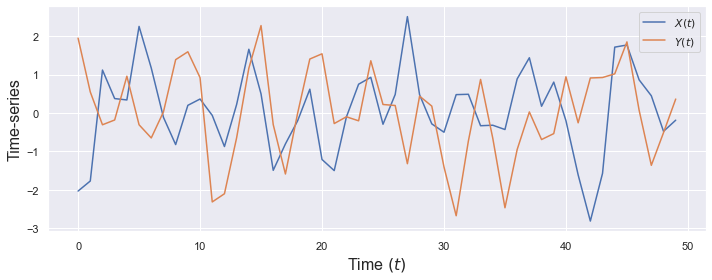

In [4]:
# 2-Dimensional Case (Works)

# Initialization
n=2 # Dimensionality
sig=1 # std of white noise
p=2  # We are considering AR(p) models
T=50 # Total number of data points

#Defining Constant Vectors
b0=np.array([[0,0]]).T 
b1=np.array([[0.5,0.],[0.,0.5]])
b2=np.array([[-0.5,0.],[0.,-0.5]])
b=[b0,b1,b2]
eps = sig*np.random.randn(n, T) # White Noise Vector

# Generating the time-series iteratively
X=[]
for i in range(T):
    sum=b[0]+eps[:,i][...,None]
    if i<p:
        for j in range(1,i+1):
            sum+=b[j]@X[i-j]
    else:
        for j in range(1,p+1):
            sum+=b[j]@X[i-j]
    X.append(sum)

# Deriving the vector columns for X_{t-1}, X_{t-2}, ..., X_{t-p} and Y_{t-1}, Y_{t-2}, ..., Y_{t-p}

t=list(range(T))
sol=[]
for j in range(n):
    sol.append([X[i][j,0] for i in range(T)])

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(t,sol[0],label=r'$X(t)$')
ax.plot(t,sol[1],label=r'$Y(t)$')
ax.legend()
ax.set_xlabel(r"Time $(t)$", fontsize=16)
ax.set_ylabel("Time-series", fontsize=16)
fig.tight_layout()
#fig.savefig(figNameBase+"Fig2a.pdf", format='pdf', dpi=600)

GC_test(sol)

The standard deviation of the full model is  1.1587836926849813
The standard deviation of the reduced model is  1.1589254497467911


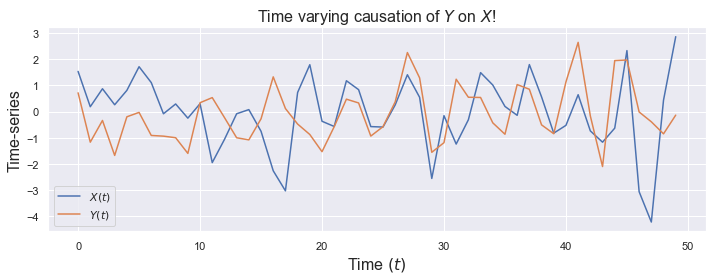

In [67]:
# Create 2D - Task 4 alter model in two ways, expecting GC test to fail
# First way: Introduce a cosine nonlinearity into the model.
n=2
b0=np.array([[0,0]]).T 
#b1=np.array([[0.5,0],[0,0.5]])
b2=np.array([[-0.5,0],[0,-0.5]])
#b=[b0,b1,b2]
sig=1
p=2 
T=1000
eps = sig*np.random.randn(n, T) # White Noise Vector

X=[]
for i in range(T):
    b1=np.array([[0.5,0.7*np.cos(i)],[0,0.5]])
    b=[b0,b1,b2]
    sum=b[0]+eps[:,i][...,None]
    if i<p:
        for j in range(1,i+1):
            sum+=b[j]@X[i-j]
    else:
        for j in range(1,p+1):
            sum+=b[j]@X[i-j]
    X.append(sum)

t=list(range(T))
sol=[]
for j in range(n):
    sol.append([X[i][j,0] for i in range(T)])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(t[:50],sol[0][:50],label=r'$X(t)$')
ax.plot(t[:50],sol[1][:50],label=r'$Y(t)$')
ax.legend()
ax.set_xlabel(r"Time $(t)$", fontsize=16)
ax.set_ylabel("Time-series", fontsize=16)
ax.set_title(r"Time varying causation of $Y$ on $X$!", fontsize=16)
fig.tight_layout()
fig.savefig("Fig5-1.png", format='png', dpi=600)

GC_test(sol)

The standard deviation of the full model is  1.248033642901738
The standard deviation of the reduced model is  1.5325685255844572


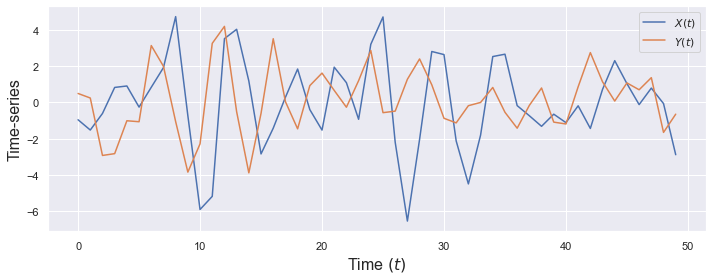

In [62]:
# Lurking Variable
n=3
b0=np.array([[0,0,0]]).T 
b1=np.array([[0.5,0, 0],[0,0.4, 1], [0,0,0.6]])
b2=np.array([[-0.5,0, 1],[0,-0.4, 0], [0,0,-0.6]])
b=[b0,b1,b2]
sig=1
p=2 
T=1000
eps = sig*np.random.randn(n, T) # White Noise Vector

X=[]
for i in range(T):
    sum=b[0]+eps[:,i][...,None]
    if i<p:
        for j in range(1,i+1):
            sum+=b[j]@X[i-j]
    else:
        for j in range(1,p+1):
            sum+=b[j]@X[i-j]
    X.append(sum)

t=list(range(T))
sol=[]
for j in range(n):
    sol.append([X[i][j,0] for i in range(T)])
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(t[:50],sol[0][:50],label=r'$X(t)$')
ax.plot(t[:50],sol[1][:50],label=r'$Y(t)$')
ax.legend()
ax.set_xlabel(r"Time $(t)$", fontsize=16)
ax.set_ylabel("Time-series", fontsize=16)
fig.tight_layout()
#fig.savefig("Fig5-1.png", format='png', dpi=600)

GC_test(sol)

The standard deviation of the full model is  1.7038667375163308
The standard deviation of the reduced model is  1.784842313406554


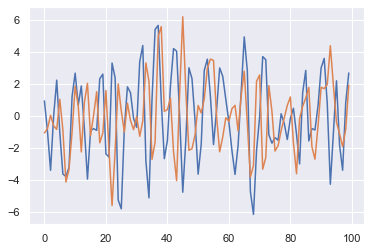

In [25]:
# Create 2D - Task 4 alter model in two ways, expecting GC test to fail
# Second way: X is ARMA(p,q) model ASSUME p=q FOR THIS, only for n=2
# this cell creates X vector for ARMA(p,q) model, n=2
X=[]
n = 2
theta1=np.array([[0.5,0.6],[.9,0.5]])
theta2=np.array([[-0.5,0.8],[0.76,-0.5]])
theta=[theta1,theta2] #there's no theta_0 for ARMA
b0=np.array([[0,0]]).T
b1=np.array([[0.5,0],[0,0.5]])
b2=np.array([[-0.5,0],[0,-0.5]])
b=[b0,b1,b2]
eps = []
p=2
q=2
T=100
sig = 1
eps = sig * np.random.randn(n, T)

for i in range(T):
    sum=b[0]+eps[:,i][...,None]
    if i<p:
        for j in range(1,i+1):
            sum+=b[j]@X[i-j] + theta[j-1]@eps[:,i-j][...,None] #theta[j-1] bc there's no theta_0 for ARMA
    else:
        for j in range(1,p+1):
            sum+=b[j]@X[i-j] + theta[j-1]@eps[:,i-j][...,None]
    X.append(sum)

sol=[]
for j in range(n):
    sol.append([X[i][j,0] for i in range(T)])
t=list(range(T))
plt.plot(t,sol[0])
plt.plot(t,sol[1])
GC_test(sol)